# Movies that scientists love

**We are going to get a list of the top films as rated by scientists.**

We first read in our three tables of interest: movies, ratings and users. They were obtained from MovieLens.

In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander_2020_2021/master/Datasets/MovieLens/movies-separated_by_money-raw.csv", sep = "$")
ratings = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander_2020_2021/master/Datasets/MovieLens/ratings-raw.csv")
users = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander_2020_2021/master/Datasets/MovieLens/users-full.csv")

In [2]:
users

,user_id,gender,age_id,age_range,occupation_id,occupation,cp
0,1,F,1,Under 18,10,K-12 student,48067
1,2,M,56,56+,16,self-employed,70072
2,3,M,25,25-34,15,scientist,55117
3,4,M,45,45-49,7,executive/managerial,02460
4,5,M,25,25-34,20,writer,55455
...,...,...,...,...,...,...,...
6035,6036,F,25,25-34,15,scientist,32603
6036,6037,F,45,45-49,1,academic/educator,76006
6037,6038,F,56,56+,1,academic/educator,14706
6038,6039,F,45,45-49,0,other or not specified,01060


We add the column "occupation" from the table users.

In [3]:
ratings = pd.merge(ratings, users[["user_id", "occupation"]], on="user_id", how="left")
ratings

,user_id,movie_id,rating,timestamp,occupation
0,1,1193,5,978300760,K-12 student
1,1,661,3,978302109,K-12 student
2,1,914,3,978301968,K-12 student
3,1,3408,4,978300275,K-12 student
4,1,2355,5,978824291,K-12 student
...,...,...,...,...,...
1000204,6040,1091,1,956716541,doctor/health care
1000205,6040,1094,5,956704887,doctor/health care
1000206,6040,562,5,956704746,doctor/health care
1000207,6040,1096,4,956715648,doctor/health care


From the table ratings, we select only the ones made by scientists.

In [4]:
ratings = ratings[ratings["occupation"] == "scientist"]
ratings

,user_id,movie_id,rating,timestamp,occupation
182,3,3421,4,978298147,scientist
183,3,1641,2,978298430,scientist
184,3,648,3,978297867,scientist
185,3,1394,4,978298147,scientist
186,3,3534,3,978297068,scientist
...,...,...,...,...,...
999518,6036,562,4,956752417,scientist
999519,6036,1096,4,956712474,scientist
999520,6036,1097,4,956712981,scientist
999521,6036,1099,4,956752131,scientist


In [5]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


We add the title of the films to the table movies, so that now we have all the details of the ratings made by scientists.

In [6]:
ratings = pd.merge(ratings, movies[["movie_id", "title"]], how='left', on='movie_id')
ratings

,user_id,movie_id,rating,timestamp,occupation,title
0,3,3421,4,978298147,scientist,Animal House (1978)
1,3,1641,2,978298430,scientist,"Full Monty, The (1997)"
2,3,648,3,978297867,scientist,Mission: Impossible (1996)
3,3,1394,4,978298147,scientist,Raising Arizona (1987)
4,3,3534,3,978297068,scientist,28 Days (2000)
...,...,...,...,...,...,...
22946,6036,562,4,956752417,scientist,Welcome to the Dollhouse (1995)
22947,6036,1096,4,956712474,scientist,Sophie's Choice (1982)
22948,6036,1097,4,956712981,scientist,E.T. the Extra-Terrestrial (1982)
22949,6036,1099,4,956752131,scientist,"Christmas Carol, A (1938)"


Now we want to select only the films that were rated more than 50 times.

In [7]:
ratings.groupby("movie_id")["movie_id"].size().sort_values(ascending=False)

movie_id
1196    88
260     85
2858    84
1198    75
1197    75
        ..
944      1
2443     1
947      1
72       1
1816     1
Name: movie_id, Length: 2517, dtype: int64

In [9]:
more_than_50 = ratings.groupby("movie_id")["movie_id"].size().sort_values(ascending=False)
more_than_50 = more_than_50[more_than_50 > 50]
more_than_50

movie_id
1196    88
260     85
2858    84
1198    75
1197    75
593     75
1097    72
1210    71
589     71
608     71
480     71
1270    70
2571    68
1214    67
2028    67
2396    66
2628    66
858     66
2716    65
2997    63
1580    63
1240    63
2762    61
110     61
296     59
2916    59
924     58
1617    58
541     58
1200    56
1265    56
1       55
318     54
527     54
1036    53
1136    52
750     51
Name: movie_id, dtype: int64

We cast it to a list and select from the dataframe ratings only the films that are in this list.

In [10]:
more_than_50 = list(more_than_50)
ratings = ratings[ratings["movie_id"].isin(more_than_50)]
ratings

,user_id,movie_id,rating,timestamp,occupation,title
261,22,65,3,981605647,scientist,Bio-Dome (1996)
272,22,70,4,978136888,scientist,From Dusk Till Dawn (1996)
504,111,52,3,977512411,scientist,Mighty Aphrodite (1995)
1426,412,52,5,976562522,scientist,Mighty Aphrodite (1995)
1430,412,58,4,976288076,scientist,"Postino, Il (The Postman) (1994)"
...,...,...,...,...,...,...
20328,5604,58,5,960001179,scientist,"Postino, Il (The Postman) (1994)"
21035,5710,58,5,958519255,scientist,"Postino, Il (The Postman) (1994)"
21229,5737,58,4,958419197,scientist,"Postino, Il (The Postman) (1994)"
21591,5963,52,3,957019019,scientist,Mighty Aphrodite (1995)


We select the title of the films and the average of ratings made by scientists.

In [11]:
mean_of_scientists_ratings_sorted = ratings.groupby("title")["rating"].mean().sort_values(ascending=False)
mean_of_scientists_ratings_sorted

title
Lamerica (1994)                              5.000000
Postino, Il (The Postman) (1994)             4.062500
Black Sheep (1996)                           4.000000
Mighty Aphrodite (1995)                      3.923077
Angels and Insects (1995)                    3.500000
French Twist (Gazon maudit) (1995)           3.400000
Bio-Dome (1996)                              3.000000
Kicking and Screaming (1995)                 3.000000
From Dusk Till Dawn (1996)                   2.888889
Lawnmower Man 2: Beyond Cyberspace (1996)    2.000000
Fair Game (1995)                             1.500000
Name: rating, dtype: float64

Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

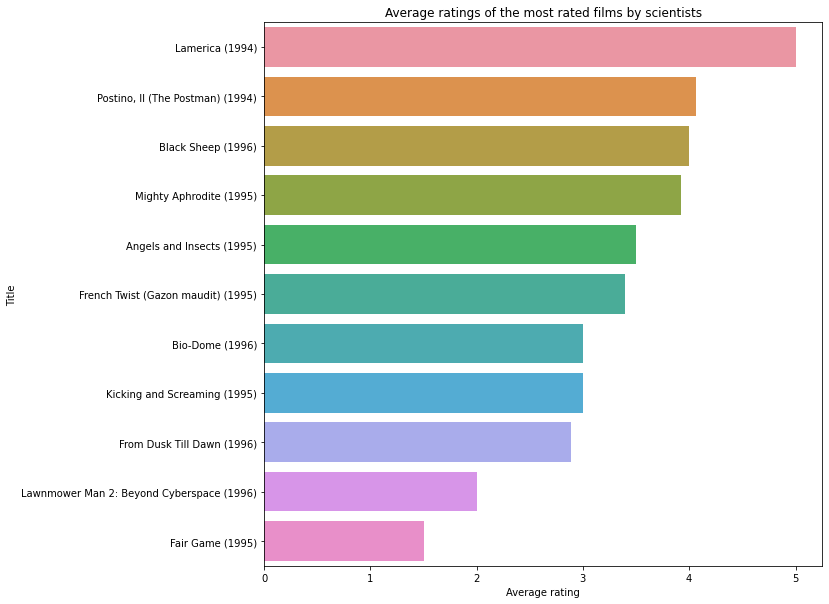

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Average ratings of the most rated films by scientists')
sns.barplot(x=mean_of_scientists_ratings_sorted, y=mean_of_scientists_ratings_sorted.index, ax=ax)
ax.set(ylabel='Title', xlabel='Average rating');